In [8]:
import zipfile
with zipfile.ZipFile("575071.zip","r") as zip_ref:
    zip_ref.extractall("")

In [12]:
# %pip install geopandas


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 5.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import geopandas as gdp
polygons=gdp.read_file("575071")
polygons

/Users/Marek/Library/Python/3.9/lib/python/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in '575071': 'ZSJ_P' (default), 'OBEC_P', 'SO_B', 'ADRM_B', 'UL_B', 'CO_B', 'KATUZE_P', 'UL_L', 'VO_P'. Specify layer parameter to avoid this warning.
  result = read_func(


,KOD,NAZEV,KATUZE_KOD,OBEC_KOD,POU_KOD,ORP_KOD,OKRES_KOD,LAU1_KOD,LAU2_KOD,CHAR_KOD,geometry
0,330841,Elektrárna Chvaletice,655015,575071,2313,1091,3606,CZ0532,CZ0532 575071,3,"POLYGON ((-671020.35 -1058651.97, -671007.72 -..."
1,55018,Hornická Čtvrť,655015,575071,2313,1091,3606,CZ0532,CZ0532 575071,11,"POLYGON ((-671020.35 -1058651.97, -671020.9 -1..."
2,165697,Chvaletice,765694,575071,2313,1091,3606,CZ0532,CZ0532 575071,11,"POLYGON ((-673803.01 -1058017.33, -673793.95 -..."


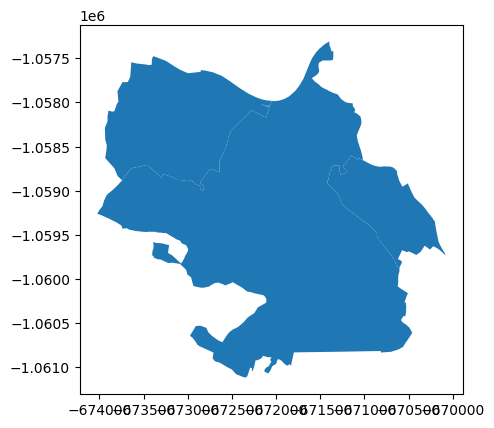

In [25]:
# ax=polygons.plot()
ax=polygons.plot()

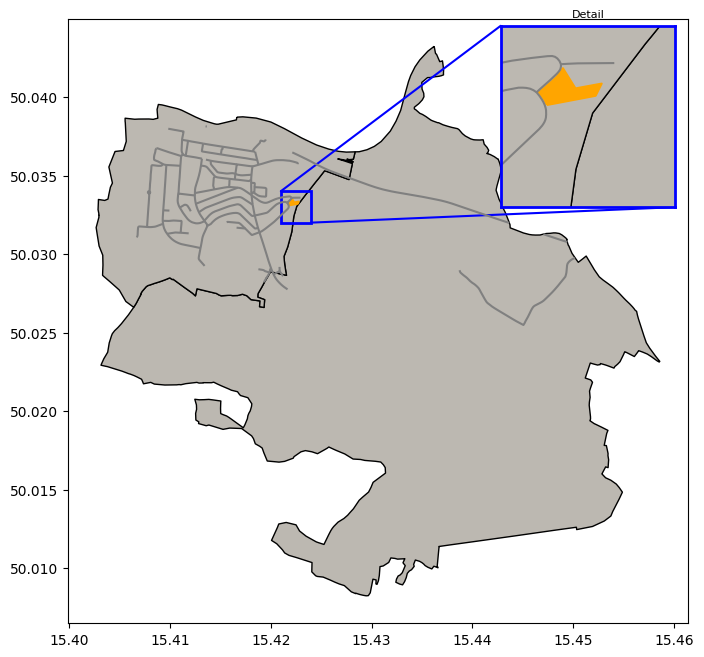

In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle, ConnectionPatch

# Načtení dat
Chva_katuze = gpd.read_file("575071/KATUZE_P.shp").to_crs(epsg=4326)
Chva_ulice = gpd.read_file("575071/UL_L.shp").to_crs(epsg=4326)
OSM_uvnitr = gpd.read_file("/Users/Marek/Documents/GitHub/GeoJSON/polygon_DidiniChva.geojson").to_crs(epsg=4326)

# Hlavní mapa
fig, ax = plt.subplots(figsize=(8, 8))
Chva_katuze.plot(ax=ax, color="#BCB8B1", edgecolor="black")
Chva_ulice.plot(ax=ax, color="gray", edgecolor="gray")
OSM_uvnitr.plot(ax=ax, color="orange", edgecolor="orange", linewidth=1.5)

# Souřadnice oblasti pro detail
x_min, x_max = 15.421, 15.424
y_min, y_max = 50.032, 50.034

# Obdélník na hlavní mapě
rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                 linewidth=2, edgecolor="blue", facecolor="none")
ax.add_patch(rect)

# Inset (výřez)
iax = inset_axes(ax, width="30%", height="30%", loc="upper right")

# Vykreslit všechny vrstvy i na insetu
Chva_katuze.plot(ax=iax, color="#BCB8B1", edgecolor="black")
Chva_ulice.plot(ax=iax, color="gray", edgecolor="gray")
OSM_uvnitr.plot(ax=iax, color="orange", edgecolor="orange", linewidth=1.5)

# Nastavit rozsah insetu podle obdélníku
iax.set_xlim(x_min, x_max)
iax.set_ylim(y_min, y_max)
iax.set_xticks([])
iax.set_yticks([])
iax.set_title("Detail", fontsize=8)

# Vodící čáry z levého horního a pravého spodního rohu obdélníku
upper_left = (x_min, y_max)
lower_right = (x_max, y_min)

# nastavení barvy obrysu (spines)
for spine in iax.spines.values():
    spine.set_edgecolor("blue")   # barva obrysu
    spine.set_linewidth(2)       # tloušťka čáry

line1 = ConnectionPatch(xyA=upper_left, xyB=upper_left, coordsA="data", coordsB="data",
                        axesA=iax, axesB=ax, color="blue", linewidth=1.5)
line2 = ConnectionPatch(xyA=lower_right, xyB=lower_right, coordsA="data", coordsB="data",
                        axesA=iax, axesB=ax, color="blue", linewidth=1.5)

ax.add_artist(line1)
ax.add_artist(line2)

# Uložit mapu do souboru
plt.savefig("chva_OSM_map.png", dpi=300, bbox_inches="tight")

plt.show()

